# Clusterización para el problema de predicción de abandono (churn) de clientes

---

<h1>Resumen:</h1>

<h2>1. Algoritmos de clustering</h2>
<h2>2. El problema de predicción de churn de clientes</h2>
<h2>3. Clusterización +  reducción de dimensionalidad</h2>

---

<h1>1. Algoritmos de clustering</h1>

- ## no hay una variable 'target' asociada al dataset
- ## usamos apenas las features del dataset y medidas de distancia y densidad

---

<h2>1.1. Generando datasets sintéticos</h2>

### Importando Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Importando NumPy

In [ ]:
import numpy as np

### Valor de seed

In [ ]:
np.random.seed(0)

### Número de muestras/puntos

In [ ]:
n_samples = 1500

### Función para mostrar el dataset sintético

In [ ]:
def show_synthetic_dataset(X):
    figure = plt.figure(figsize=(7, 7))

    ax = plt.subplot(1, 1, 1)

    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')

    ax.set_xticks(())
    ax.set_yticks(())
    ax;

### Importando los métodos de generación de datasets

In [ ]:
from sklearn import datasets

---

<h2>1.1.1. Dataset con 2 circunferencias concéntricas</h2>

In [ ]:
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5,
                                      noise=.1)

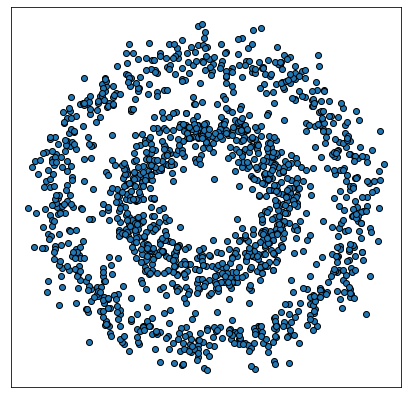

In [ ]:
show_synthetic_dataset(noisy_circles[0])

---

<h2>1.1.2. Dataset con dos lunas</h2>

In [ ]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.1)

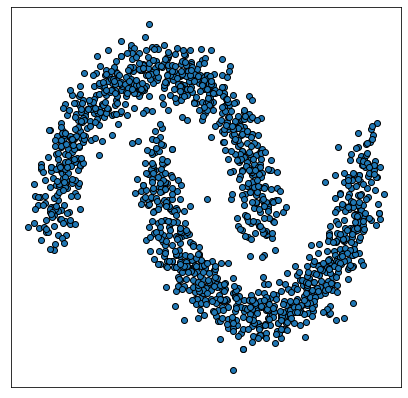

In [ ]:
show_synthetic_dataset(noisy_moons[0])

---

<h2>1.1.3. Dataset con burbujas gaussianas</h2>

In [ ]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=20)

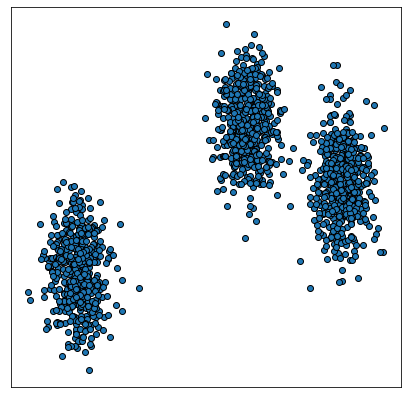

In [ ]:
show_synthetic_dataset(blobs[0])

---

<h2>1.1.4. Datos distribuídos de forma anisotrópica</h2>

### Generando dataset con burbujas gaussianas

In [ ]:
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

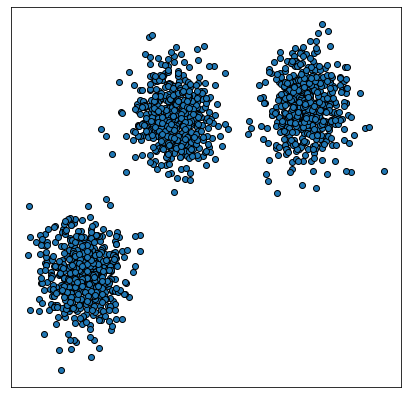

In [ ]:
show_synthetic_dataset(X)

### Transformación en el espacio usando multiplicación de matrices

In [ ]:
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

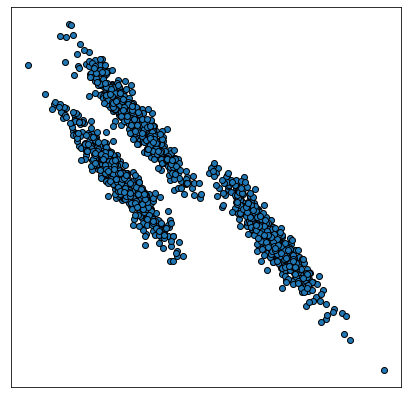

In [ ]:
show_synthetic_dataset(X_aniso)

---

<h2>1.1.5. Burbujas gaussianas con variancias diferentes</h2>

In [ ]:
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

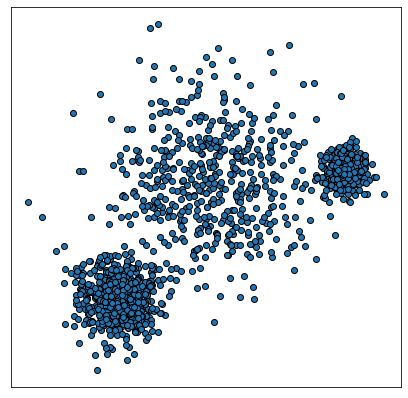

In [ ]:
show_synthetic_dataset(varied[0])

---

<h2>1.2. Resultados obtenidos</h2>

- ## Affinity Propagation
- ## Mean Shift
- ## Spectral Clustering
- ## Agglomerative Clustering

<img src="https://cienciadedadosnaveia.com/wp-content/uploads/2021/08/cluster_1.png" width="900px">

- ## DBSCAN
- ## Birch
- ## k-means
- ## Gaussian Mixture

<img src="https://cienciadedadosnaveia.com/wp-content/uploads/2021/08/cluster_2.png" width="900px">

---

<h1>2. El problema de predicción del abandono (en inglés, churn) de clientes</h1>

- ### Representa la salida de clientes de la base de datos
- ### Preocupación comun en modelos de negocio basados en ventas recurrentes o mensualidades
- ### Crucial para negócios que presentan elevado costo de adquisición de clientes y baja mensualidad
- ### Una tasa de churn elevada puede desequilibrar el flujo de caja de la empresa
- ### Para garantizar la prosperidad de una empresa a largo plazo, es necesario minimizar el churn

---

### Vamos realizar predicción de churn usando la base de datos 'Telco Customer Churn', disponible en Kaggle (<a href="https://www.kaggle.com/blastchar/telco-customer-churn">https://www.kaggle.com/blastchar/telco-customer-churn</a>)


### Columnas de la base de datos:

### Dos columnas numéricas:
- <b>MonthlyCharges</b>: el monto pagado mensualmente por el cliente.
- <b>TotalCharges</b>: el monto total pagado por el cliente (valor de por vida)

### 18 colunas categóricas:
- <b>CustomerID</b>: ID de cliente
- <b>gender</b>: género del cliente (hombre o mujer)
- <b>SeniorCitizen</b>: indica si el cliente es un jubilado o no (1, 0)
- <b>Partner</b>: indica si el cliente tiene un socio o no (Sí, No)
- <b>Dependents</b>: indica si el cliente tiene dependientes o no (Sí, No)
- <b>Tenure</b>: número de meses que el cliente ha utilizado el servicio.
- <b>PhoneService</b>: indica si el cliente tiene un servicio telefónico o no (Sí, No)
- <b>MultipleLines</b>: indica si el cliente tiene varias líneas telefónicas o no (Sí, No, Sin servicio telefónico)
- <b>InternetService</b>: el proveedor de servicios de Internet del cliente (DSL, fibra óptica, No)
- <b>OnlineSecurity</b>: indica si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)
- <b>OnlineBackup</b>:indica si el cliente tiene una copia de seguridad en línea o no (Sí, No, Sin servicio de Internet)
- <b>DeviceProtection</b>: indica si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)
- <b>TechSupport</b>: indica si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de Internet)
- <b>StreamingTV</b>: indica si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de Internet)
- <b>StreamingMovies</b>: indica si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de Internet)
- <b>Contract</b>: plazo del contrato del cliente (mes a mes, un año, dos años)
- <b>PaperlessBilling</b>: indica si el cliente recibe la factura sin estar impresa (Sí, No)
- <b>PaymentMethod</b>: método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))

### Importando Pandas

In [ ]:
import pandas as pd

### Cargando la base de datos

In [ ]:
df = pd.read_csv("/content/sample_data/Telco-Customer-Churn.csv")

## Alterando los tipos de datos para facilitar la manipulación de datos y reducir el uso de recursos computacionales

In [ ]:
# convirtiendo los datos categóricos
df['gender'] = df['gender'].astype('category')
df['customerID'] = df['customerID'].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Partner'] = df['Partner'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['PhoneService'] = df['PhoneService'].astype('category')
df['MultipleLines'] = df['MultipleLines'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineBackup'] = df['OnlineBackup'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].astype('category')
df['TechSupport'] = df['TechSupport'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['StreamingMovies'] = df['StreamingMovies'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

In [ ]:
# dato numérico
df['tenure'] = df['tenure'].astype('int32')

In [ ]:
# convirtiendo el dato numérico
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

## Alterando la variáble 'churn' para entero

In [ ]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df['Churn'] = df['Churn'].astype('int32')

## Cantidad de valores nulos para 'TotalCharges':

In [ ]:
df['TotalCharges'].isnull().sum()

11

- ## hubo error en la conversión de datos!!

## Eliminando los valores nulos para 'TotalCharges'

In [ ]:
df.drop(df[df['TotalCharges'].isnull() == True].index, inplace=True)

## info() del DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int32   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

---

<h1>3. Clusterización + Reducción de dimensionalidad</h1>

---

<h2>3.1. Preparando los datos</h2>

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Eliminando la columna 'customerID'

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)

## Transformando las variábles categóricas (tambiém puede usar el OneHotEncoder de Scikitlearn)

In [ ]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Contract',
       'PhoneService']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
X

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,PhoneService_Yes
0,1,29.85,29.85,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,34,56.95,1889.50,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,2,53.85,108.15,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1
7039,72,103.20,7362.90,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1
7040,11,29.60,346.45,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7041,4,74.40,306.60,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


## Eliminando la columna 'Churn' de X

In [ ]:
X.drop(['Churn'], axis=1, inplace=True)

In [ ]:
X

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,PhoneService_Yes
0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,34,56.95,1889.50,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,2,53.85,108.15,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1
7039,72,103.20,7362.90,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1
7040,11,29.60,346.45,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7041,4,74.40,306.60,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


---

## Generando un dataset con 2 dimensiones para visualizar los resultados

Esto por que tenemos 30 columnas y transformamos para 2 que podemos visualizar

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_red = PCA(n_components=2).fit_transform(X)

In [ ]:
X_red.shape

(7032, 2)

In [ ]:
X_red

array([[-2.25385912e+03, -8.86372352e+00],
       [-3.93823760e+02, -6.23483844e+00],
       [-2.17534885e+03,  1.19067763e+01],
       ...,
       [-1.93719637e+03, -1.47155481e+01],
       [-1.97671867e+03,  2.87028191e+01],
       [ 4.56150029e+03,  4.46456764e+00]])

---

<h2>3.2. Resultados para k-means</h2>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
y_pred = KMeans(init="k-means++", n_clusters=3, random_state=0).fit_predict(X)

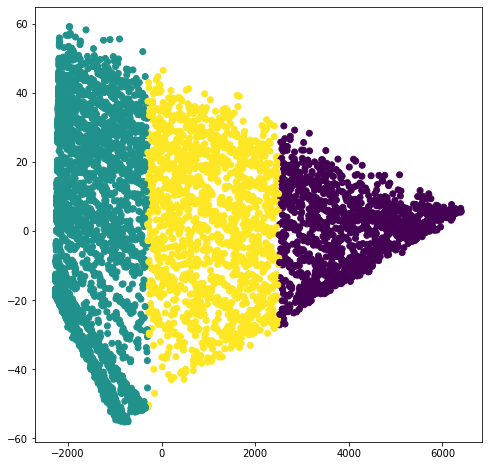

In [ ]:
# usando datos reducidos para visualizar
plt.figure(figsize=(8, 8))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y_pred);
plt.show()

---

<h2>3.3. Resultados para DBSCAN</h2>

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
y_pred = DBSCAN(eps = 0.5).fit_predict(X)

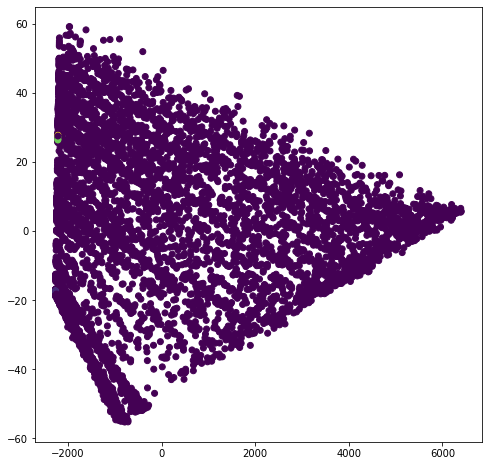

In [ ]:
# resultado pésimo, solo un cluster
plt.figure(figsize=(8, 8))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y_pred);
plt.show()

---

<h2>3.4. Resultados para Gaussian Mixture</h2>

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
y_pred = GaussianMixture(n_components = 3).fit_predict(X)

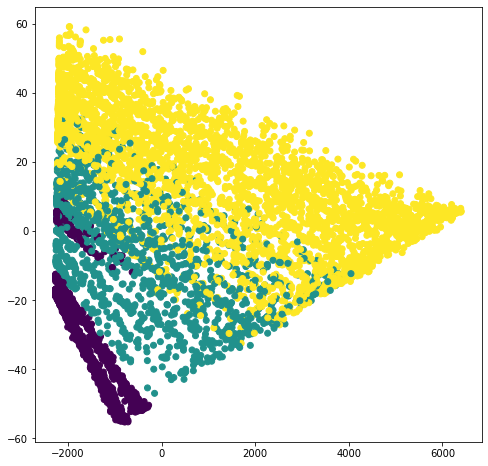

In [ ]:
# muy mezclado no es bueno para el negocio no puede identificar grupos
plt.figure(figsize=(8, 8))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y_pred);
plt.show()

---

<h2>3.5. Cambiando la escala de los datos</h2>

In [ ]:
# cambiar la escala de los datos para tener datos representativos
from sklearn.preprocessing import StandardScaler

In [ ]:
X_ss = StandardScaler().fit_transform(X)

In [ ]:
X_red_ss = PCA(n_components=2).fit_transform(X_ss)

## Usando un algoritmo de clustering

In [ ]:
y_pred = KMeans(init="k-means++", n_clusters=3, random_state=0).fit_predict(X_ss)

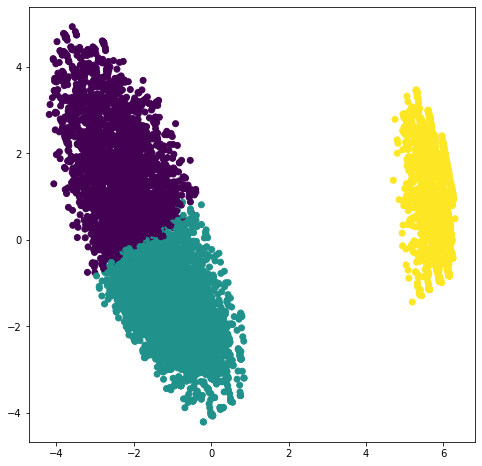

In [ ]:
#  mejora el análisis ya puede distinguir entre dos grupos
plt.figure(figsize=(8, 8))
plt.scatter(X_red_ss[:, 0], X_red_ss[:, 1], c=y_pred);
plt.show()

---